In [18]:
import numpy as np
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
# I need this line or the kernal dies immediately when running the NN.
# You may not need this line. 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

### Load in Data

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### View What is being classified

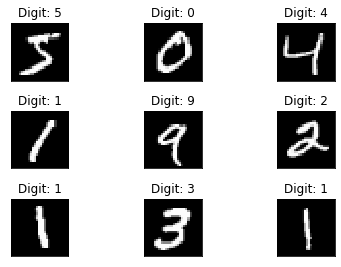

In [20]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

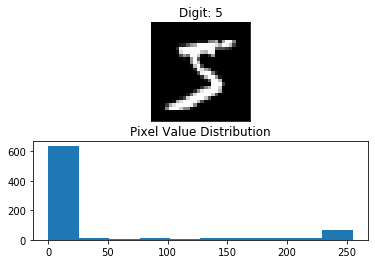

In [21]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution");

### Reshaping our Data

In [22]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10_000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255.
X_test /= 255.

# print the final input shape ready for training
print("Train matrix shape:", X_train.shape)
print("Test matrix shape:", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape: (60000, 784)
Test matrix shape: (10000, 784)


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding:", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding:", Y_train.shape)

Shape before one-hot encoding: (60000,)
Shape after one-hot encoding: (60000, 10)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Building the Network

In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()

# Input Layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Hidden Layer
model.add(Dense(512))  #512 the number of neurons inside of the layer
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(10)) # 10 different outputs for 10 different digits
model.add(Activation('softmax'))

W0927 12:35:59.849350 17892 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 12:35:59.865378 17892 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 12:35:59.869345 17892 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 12:35:59.886382 17892 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Pleas

In [12]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', 
             metrics=['accuracy'],
             optimizer='adam')

W0927 12:35:59.963344 17892 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0927 12:35:59.990348 17892 deprecation_wrapper.py:119] From C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 2s - loss: 0.0562 - acc: 0.9822 - val_loss: 0.0671 - val_acc: 0.9797
Epoch 2/2
 - 2s - loss: 0.0455 - acc: 0.9856 - val_loss: 0.0637 - val_acc: 0.9811
Saved trained model at ../results/keras_mnist.h5 


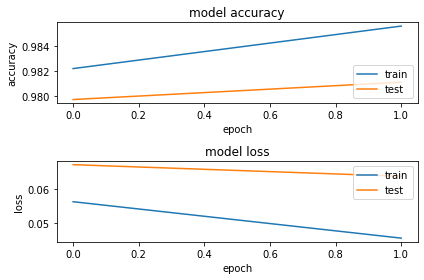

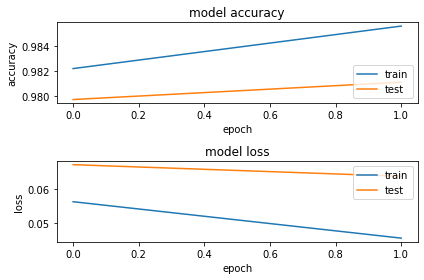

In [17]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
                   batch_size=128, epochs=2,
                   verbose=2,
                   validation_data=(X_test, Y_test))

# saving the model
save_dir = "../results/"
model_name = 'keras_mnist.h5'
model_path = save_dir+model_name
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Solve for the output layer of this basic Neural Network

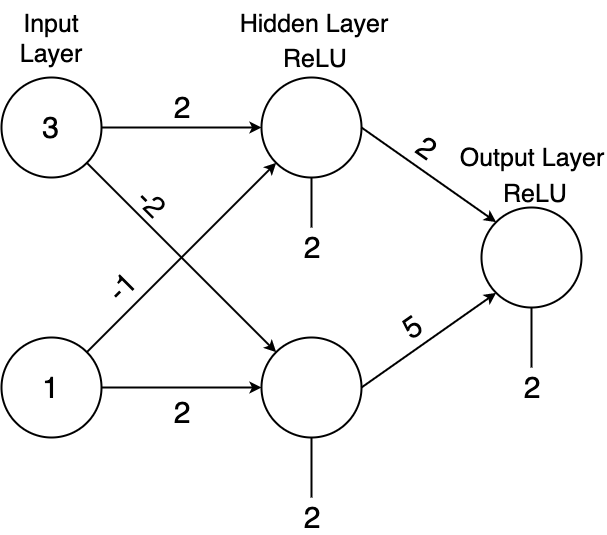

The basics of a neural network is no more complicated than solving a regression problem.  The slope multiplied by the change in X and add the bias.  In the example above, the slopes are the numbers on the lines.  The bias is the numbers under the circles and the change in X is the value inside the circle.

The major difference to basic regression is incorporation of activations.  That is specifically the ReLU or the handful of other activation functions

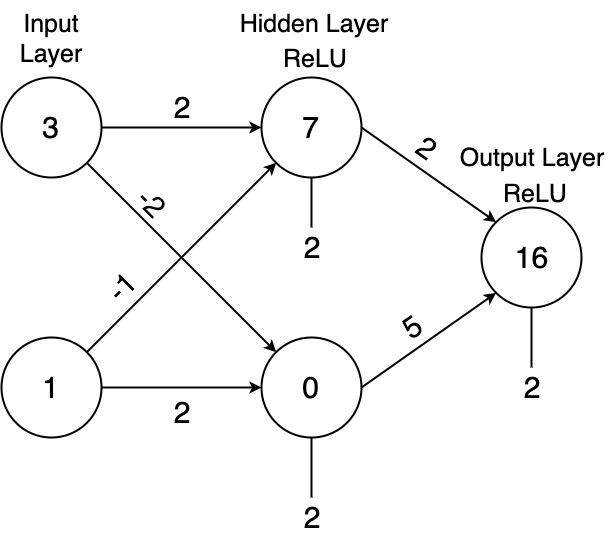

## Activation Functions
One of the choices for the hidden layers and the output layers is deciding on the activation function

#### What is an Activation Function?
Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

#### Why Do we need Activation Functions?
A neural network with no activation functions is essentially Linear Regression.  Try doing the above diagram without the ReLU activation function and see what the results are.

The activation functions put in non-linear transformations allowing the neural network to do more complex tasks, such as image recognition.



In [19]:
# Values for plotting
input_values = np.arange(-10, 11, 1)

input_values

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

#### Regression Activation Functions

Why are these Regression Functions?

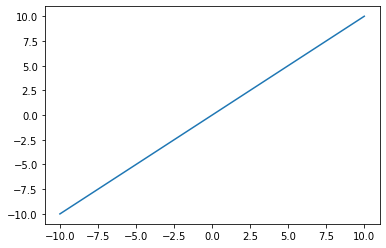

In [20]:
def linear(x):
    return x

output_values = linear(input_values)
plt.plot(input_values, output_values);

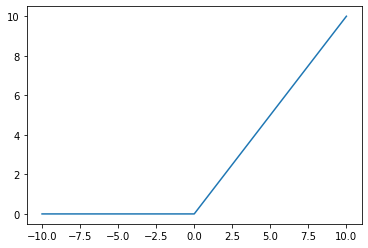

In [24]:
def ReLU(x):
    return np.maximum(0, x)

output_values = ReLU(input_values)
plt.plot(input_values, output_values);

#### Classification Activation Functions

Why are these Classification Functions?

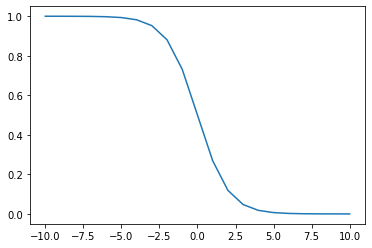

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(x))

output_values = sigmoid(input_values)

plt.plot(input_values, output_values);

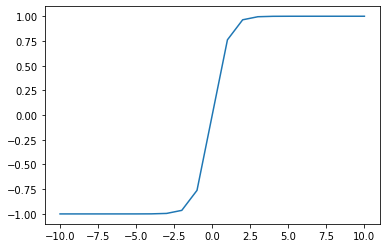

In [26]:
def tanh(x):
    return 2 / (1 + np.exp(-2 * x)) - 1

output_values = tanh(input_values)

plt.plot(input_values, output_values);

The sum of all Softmax activations should be: 1.0


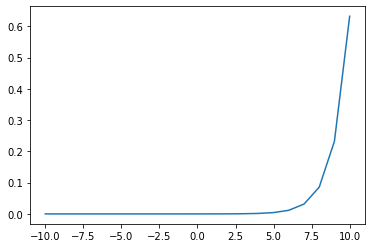

In [28]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

output_values = softmax(input_values)

print("The sum of all Softmax activations should be:", sum(softmax(input_values)))
plt.plot(input_values, output_values);

## Team Discussion

**For our Sea Lion Count, which of these activation functions will we use?**  

Keep in mind that you can use multiple functions in one neural network.

## Back Propagation

This is why Neural Networks work so well! (And also why I wish I understood it better to help teach you all...)

Comparison of the ground truth to the predicted truth to calculate loss.  This uses partial derivatives to help optimize the loss to as small a value as possible.

Different optimizers help teach the network at different rates.  Too high a learning rate and it might skip over the best answer.  Too low a learning rate and it might never reach the optimal answer.

### HOMEWORK
Read-up on different optimizers and how one might be of more value than others.  Also review how you might decide on the Activation Function you will need for a specific problem.

[Activation Functions and it's type - Which is better?](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)

[Keras Optimizers](https://keras.io/optimizers/)

In [ ]:
X = All the original images (5000, 128, 128)
y = (0, 0, 0, 0, 0)